In [24]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.statista.com/statistics/316750/inflation-rate-in-argentina/')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table hidden" id="statTableHTML"><thead><tr><th>Characteristic</th><th>Inflation rate compared to previous year</th></tr></thead><tbody><tr><td>2027*</td><td>24.19<span>%</span></td></tr><tr><td>2026*</td><td>29.18<span>%</span></td></tr><tr><td>2025*</td><td>35.3<span>%</span></td></tr><tr><td>2024*</td><td>38.5<span>%</span></td></tr><tr><td>2023*</td><td>43.46<span>%</span></td></tr><tr><td>2022*</td><td>51.73<span>%</span></td></tr><tr><td>2021</td><td>48.41<span>%</span></td></tr><tr><td>2020</td><td>42.02<span>%</span></td></tr><tr><td>2019</td><td>53.55<span>%</span></td></tr><tr><td>2018</td><td>34.28<span>%</span></td></tr><tr><td>2017</td><td>25.68<span>%</span></td></tr><tr><td>2016</td><td>-</td></tr><tr><td>2015</td><td>-</td></tr><tr><td>2014</td><td>-</td></tr><tr><td>2013</td><td>10.62<span>%</span></td></tr><tr><td>2012</td><td>10.04<span>%</span></td></tr><tr><td>2011</td><td>9.78<span>%</span></td></tr><tr><td>2010</td><td>10.46<span>%</span></td></tr><

In [25]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    s=s.replace('%','')
    s=s.replace('*','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])


[['Characteristic', 'Inflation rate compared to previous year'], ['2027', '24.19'], ['2026', '29.18'], ['2025', '35.3'], ['2024', '38.5'], ['2023', '43.46'], ['2022', '51.73'], ['2021', '48.41'], ['2020', '42.02'], ['2019', '53.55'], ['2018', '34.28'], ['2017', '25.68'], ['2016', '-'], ['2015', '-'], ['2014', '-'], ['2013', '10.62'], ['2012', '10.04'], ['2011', '9.78'], ['2010', '10.46'], ['2009', '6.27'], ['2008', '8.59'], ['2007', '8.83'], ['2006', '10.9'], ['2005', '9.64'], ['2004', '4.42']]


In [26]:
';'.join(table[0])

'Characteristic;Inflation rate compared to previous year'

In [27]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('inflasjon.csv',table)

In [28]:
import pandas as pd
Inflasjon = pd.read_csv('inflasjon.csv', delimiter=';', encoding='latin1')
Inflasjon

,Characteristic,Inflation rate compared to previous year
0,2027,24.19
1,2026,29.18
2,2025,35.3
3,2024,38.5
4,2023,43.46
5,2022,51.73
6,2021,48.41
7,2020,42.02
8,2019,53.55
9,2018,34.28


In [29]:
Inflasjon.drop([11,12,13], axis=0, inplace=True)
Inflasjon

,Characteristic,Inflation rate compared to previous year
0,2027,24.19
1,2026,29.18
2,2025,35.3
3,2024,38.5
4,2023,43.46
5,2022,51.73
6,2021,48.41
7,2020,42.02
8,2019,53.55
9,2018,34.28


In [30]:
Inflasjon['Inflation rate compared to previous year'] = Inflasjon['Inflation rate compared to previous year'].astype(float, errors = 'raise')
Inflasjon['Characteristic'] = Inflasjon['Characteristic'].astype(float, errors = 'raise')

(2003.0, 2028.0, 0.0, 60.0)

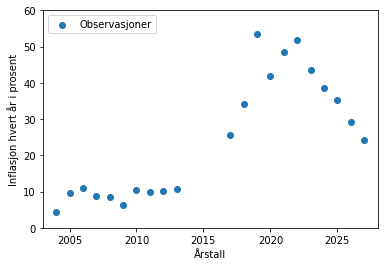

In [31]:
import numpy as np
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Inflasjon hvert år i prosent')
ax.set_xlabel('Årstall')

#plotting the function:
ax.scatter(Inflasjon['Characteristic'], Inflasjon['Inflation rate compared to previous year'],  label='Observasjoner')
ax.legend(loc='upper left')
plt.axis([2003, 2028, 0, 60])
#plt.ylim([0, 70])
#plt.yticks(np.arange(0, 70, 1))
#plt.xticks(np.arange(2004, 2020+1, 1))

In [32]:
y=Inflasjon['Inflation rate compared to previous year']
pd.DataFrame(y)

,Inflation rate compared to previous year
0,24.19
1,29.18
2,35.30
3,38.50
4,43.46
5,51.73
6,48.41
7,42.02
8,53.55
9,34.28


In [33]:
x=pd.DataFrame(Inflasjon['Characteristic'])
x['intercept']=1
x

,Characteristic,intercept
0,2027.0,1
1,2026.0,1
2,2025.0,1
3,2024.0,1
4,2023.0,1
5,2022.0,1
6,2021.0,1
7,2020.0,1
8,2019.0,1
9,2018.0,1


In [34]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Inflation rate compared to previous year   R-squared:                       0.636
Model:                                                  OLS   Adj. R-squared:                  0.616
Method:                                       Least Squares   F-statistic:                     33.13
Date:                                      Wed, 04 May 2022   Prob (F-statistic):           1.51e-05
Time:                                              22:08:42   Log-Likelihood:                -78.058
No. Observations:                                        21   AIC:                             160.1
Df Residuals:                                            19   BIC:                             162.2
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

In [35]:
res.params

Characteristic       1.778722
intercept        -3560.577544
dtype: float64

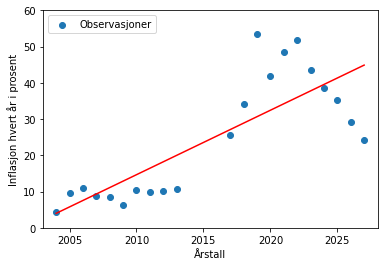

In [36]:
x=np.linspace(min(Inflasjon['Characteristic']), max(Inflasjon['Characteristic']), 100)

regression_line=res.params['intercept']+res.params['Characteristic']*x

ax.plot(x, regression_line,color='red')
fig

In [37]:
# Som vi se på reggresjons linja ser vi en stigende trend hos inflasjonen i Argentina.
# Men som vi kan se utifra de tallene vi har hentet fra nettsiden, har de forutsett en nedgang i inflasjonen i årene som kommer (23,24,25,26,27) 